# Resumen

La infertilidad es un problema creciente que afecta alrededor del 15% de las parejas en edad reproductiva en todo el mundo. Aunque tradicionalmente se ha asociado la infertilidad con factores femeninos, alrededor del 40-50% de los casos puede ser atribuido a factores masculinos. Por ello, es crucial que, en parejas que experimentan dificultades para concebir, se considere la evaluación tanto del hombre como de la mujer.

El análisis de semen, conocido como espermograma, es una herramienta esencial para diagnosticar la infertilidad masculina. Este examen evalúa diversos parámetros del semen, tales como el volumen, la concentración de espermatozoides, su motilidad y la morfología. Los resultados de este análisis proporcionan información clave sobre la salud reproductiva del hombre. Con estos datos, los especialistas pueden determinar el tipo de tratamiento más adecuado, ya sea inseminación artificial, fecundación in vitro (FIV) o el uso de donantes de esperma. 

Si bien el espermograma es muy útil, en la mayoria de los casos la infertilidad sigue siendo de causa idiopática. Esto significa que, a pesar de los avances en las pruebas y diagnósticos, aún no se pueden identificar todas las razones por las cuales algunos hombres presentan problemas de fertilidad. Por esta razón, se hace necesario mejorar tanto las técnicas utilizadas en el estudio del semen como en el procesamiento de los datos recopilados. Un enfoque más detallado y preciso podría permitir descubrir factores más sutiles que hoy en día se pasan por alto, lo que a su vez abriría nuevas posibilidades para el diagnóstico y tratamiento personalizado de la infertilidad masculina.

El objetivo general del siguiente trabajo es hacer uso de las herramientas que aportan las ciencias de datos para profundizar el análisis de los espermogramas. La hipotesis general que rige este analisis es que al aplicar técnicas avanzadas de análisis de datos, como el aprendizaje automático y la inteligencia artificial, es posible identificar patrones complejos en grandes volúmenes de datos que no son detectables a simple vista, lo que permitiría descubrir nuevas causas subyacentes de la infertilidad masculina. 

En la primera seccion (Seccion 1) del proyecto se utilizara una base de datos de la Organizacion Mundial de la Salud (WHO, 2020) que contiene datos de parametros seminales de hombres con fertilidad comprobada. El objetivo de esta seccion es realizar un estuduio detallado de la fertilidad masculina.

# Seccion 1

Importamos las librerias necesarias para el desarrollo del proyecto:

In [2]:
#para el procesamiento de los datos
import pandas as pd
import numpy as np

#para la visualizacion de los datos
import matplotlib.pyplot as plt
import seaborn as sns

Cargamos el dataset "Fertile man semen parameters 2020 - WHO":

In [3]:
url = 'https://raw.githubusercontent.com/jschiavie/Curso_Coder/refs/heads/main/Fertile_Man_WHO_2020.csv'
df_sperm = pd.read_csv(url)

#### Informacion general del DataSet

Vista general de la tabla:

In [4]:
df_sperm.head()

,Publisher,Semen_Volume,Sperm_Concentration,Total_Number,Total_Motility,Progressive_Motility,Non-progressive_Motility,Immotile_Spermatozoa,Vitality,Normal_Forms
0,Aboutorabi,3.2,27.0,86.4,35.0,20.0,15.0,65.0,NaN,NaN
1,Aboutorabi,0.8,136.0,108.8,47.0,35.0,12.0,53.0,NaN,NaN
2,Aboutorabi,2.0,71.0,142.0,49.0,42.0,7.0,51.0,NaN,NaN
3,Aboutorabi,1.0,35.0,35.0,50.0,28.0,22.0,50.0,NaN,NaN
4,Aboutorabi,2.0,46.0,92.0,51.0,28.0,33.0,49.0,NaN,NaN


In [5]:
df_sperm.tail()

,Publisher,Semen_Volume,Sperm_Concentration,Total_Number,Total_Motility,Progressive_Motility,Non-progressive_Motility,Immotile_Spermatozoa,Vitality,Normal_Forms
3584,Tang,1.7,23.0,39.1,53.0,52.0,1.0,NaN,82.0,25.0
3585,Tang,2.5,110.0,275.0,66.0,66.0,0.0,NaN,95.0,30.0
3586,Tang,2.0,109.0,218.0,64.0,44.0,20.0,36.0,NaN,11.0
3587,Tang,6.2,96.0,595.2,39.0,29.0,10.0,61.0,NaN,7.0
3588,Tang,3.0,36.0,108.0,54.0,38.0,16.0,46.0,NaN,11.0


In [6]:
df_sperm.shape

(3589, 10)

El data set contiene 10 columnas y 3589 filas. El indice representa cada muestra de semen independiente.

In [7]:
df_sperm. columns

Index(['Publisher', 'Semen_Volume', 'Sperm_Concentration', 'Total_Number',
       'Total_Motility', 'Progressive_Motility', 'Non-progressive_Motility',
       'Immotile_Spermatozoa', 'Vitality', 'Normal_Forms'],
      dtype='object')

Los parametros seminales medidos son:
- volumen de muestra
- concentracion de espermatozoides (10^6 celulas/ml)
- numero total (10^6 celulas)
- movilidad total (%)
- motilidad progresiva (%)
- motilidad no progresiva (%)
- espermatozoides inmoviles (%)
- viabilidad (%)
- forma normal (%)

Ademas se agrega una columna que indica el autor del trabajo que recopila los datos (Publisher).


In [8]:
df_sperm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3589 entries, 0 to 3588
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Publisher                 3589 non-null   object 
 1   Semen_Volume              3586 non-null   float64
 2   Sperm_Concentration       3587 non-null   float64
 3   Total_Number              3584 non-null   float64
 4   Total_Motility            3488 non-null   float64
 5   Progressive_Motility      3389 non-null   float64
 6   Non-progressive_Motility  3387 non-null   float64
 7   Immotile_Spermatozoa      2800 non-null   float64
 8   Vitality                  1337 non-null   float64
 9   Normal_Forms              3335 non-null   float64
dtypes: float64(9), object(1)
memory usage: 280.5+ KB


De este analisis descriptivo ya podemos inferir que 8 de los diez parametros utilizados contiene datos nulos entre las mediciones.

#### Preprocesamiento

##### Datos duplicados:

In [9]:
df_sperm.duplicated().sum()

np.int64(220)

La tabla tiene 220 datos duplicados. Los eliminamos:

In [10]:
df_sperm = df_sperm.drop_duplicates()

df_sperm.duplicated().sum() #chequeo que estan borrados

np.int64(0)

##### Datos igual a 0

In [11]:
df_sperm.describe() #para observar los minimos

,Semen_Volume,Sperm_Concentration,Total_Number,Total_Motility,Progressive_Motility,Non-progressive_Motility,Immotile_Spermatozoa,Vitality,Normal_Forms
count,3366.000000,3367.000000,3364.000000,3268.000000,3169.000000,3167.000000,2729.000000,1118.000000,3115.000000
mean,3.434153,84.037214,275.030948,64.354756,53.459973,11.277452,37.807129,77.598390,16.612520
std,1.552695,65.351050,235.676198,14.124526,14.123084,9.790083,12.395575,13.473628,11.433211
min,0.100000,0.900000,2.520000,0.000000,0.000000,0.000000,2.000000,29.000000,0.000000
25%,2.300000,37.000000,111.724875,55.638130,45.000000,4.000000,30.000000,70.000000,8.000000
50%,3.100000,68.000000,214.000000,64.000000,54.328358,8.000000,37.000000,78.000000,14.000000
75%,4.225000,112.000000,370.768250,73.000000,62.310030,15.000000,45.000000,89.000000,23.000000
max,12.500000,532.000000,3115.200000,100.000000,94.000000,56.000000,100.000000,100.000000,76.000000


En esta tabla se evidencia que hay muestras con motilidad total igual a 0. Esta ampliamente reportado que la motilidad es un requisito imprescindible para que haya fertilizacion. La base de datos seleccionada se realizo con muestras de hombres fertiles, por lo tanto considero que la presencia de motilidad nula es un indicador de que la muestra biologica debe ser descartada.

Elimino las filas con datos igual a 0 (en vez de reemplazar con NaN):

In [12]:
rows_with_zero = df_sperm.isin([0]).any(axis=1)
df_sperm = df_sperm.drop(df_sperm[rows_with_zero].index)

df_sperm.describe() #chequeo que los minimos ya no sean 0

,Semen_Volume,Sperm_Concentration,Total_Number,Total_Motility,Progressive_Motility,Non-progressive_Motility,Immotile_Spermatozoa,Vitality,Normal_Forms
count,3309.000000,3310.000000,3307.000000,3212.000000,3113.000000,3113.000000,2710.000000,1082.000000,3059.000000
mean,3.436446,83.727961,274.126303,64.410651,53.340932,11.453803,37.736527,77.512015,16.599052
std,1.555880,65.235749,235.228833,13.863889,13.776889,9.740929,12.274103,13.302304,11.465648
min,0.100000,0.900000,2.520000,5.000000,2.000000,0.333333,2.000000,29.000000,0.500000
25%,2.300000,37.000000,111.600000,55.638130,45.000000,4.234528,30.000000,70.000000,8.000000
50%,3.100000,67.000000,212.500000,64.000000,54.000000,9.000000,37.000000,78.000000,13.500000
75%,4.200000,111.000000,369.300000,73.000000,62.000000,15.000000,45.000000,88.750000,23.000000
max,12.500000,532.000000,3115.200000,100.000000,93.000000,56.000000,95.000000,100.000000,76.000000


In [13]:
df_sperm.shape 

(3312, 10)

Se eliminaron 57 filas.

##### Datos nulos:

In [14]:
df_sperm.isnull().sum()

Publisher                      0
Semen_Volume                   3
Sperm_Concentration            2
Total_Number                   5
Total_Motility               100
Progressive_Motility         199
Non-progressive_Motility     199
Immotile_Spermatozoa         602
Vitality                    2230
Normal_Forms                 253
dtype: int64

In [15]:
df_sperm.isnull().sum().sum()

np.int64(3593)

Mi dataset tiene un total de 3593 datos nulos, la mayoria originados en la columna de Viabilidad.

Para una mejor visualizacion utilizo un heatmap:

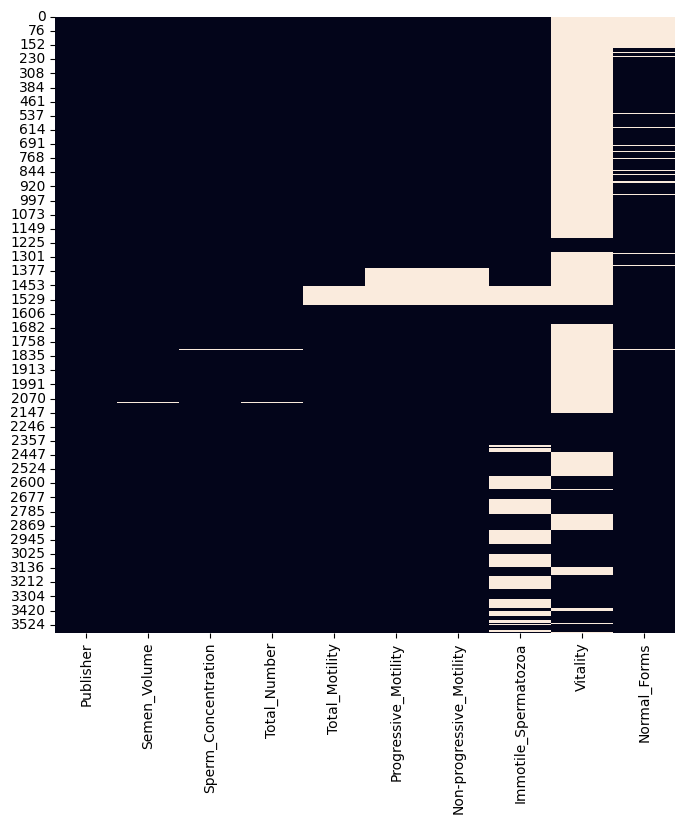

In [16]:
plt.figure(figsize=(8,8))
sns.heatmap(df_sperm.isnull(), cbar=False)
plt.show()

Para decidir con que valor reemplazar los valores NaN voy a estudiar la distribucion de cada variable por separado. Para visualizar el comportamiento, utilizo las representaciones de histograma y un boxplot.

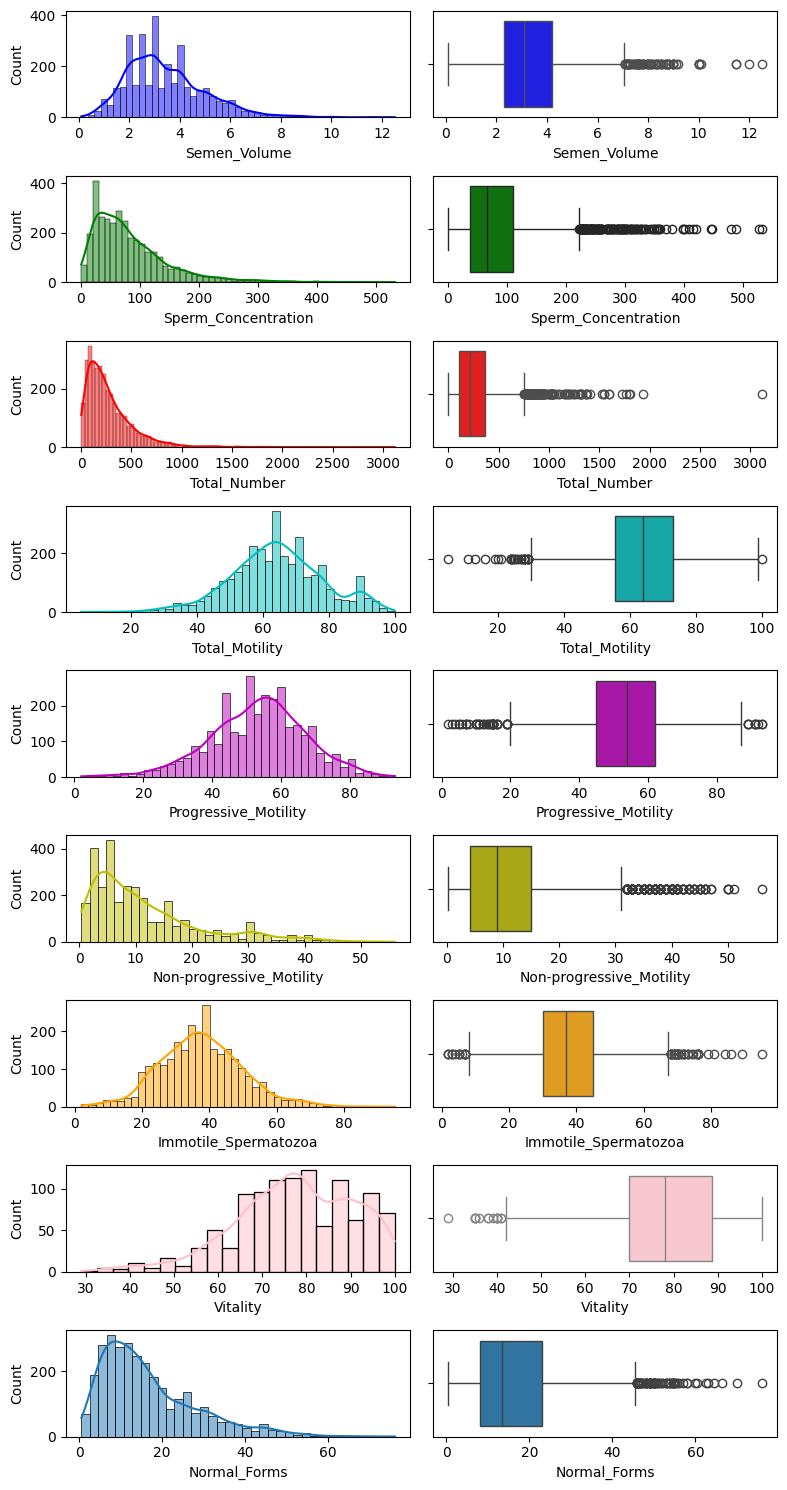

In [17]:
# Creo una figura con 9 filas y 2 columnas de subplots
fig, axs = plt.subplots(nrows=9, ncols=2, figsize=(8, 15))


# Grafico en cada subplot

sns.histplot(data=df_sperm, x='Semen_Volume', ax=axs[0, 0], color='b', kde=True)
sns.boxplot(data=df_sperm, x='Semen_Volume', ax=axs[0, 1], color='b')
sns.histplot(data=df_sperm, x='Sperm_Concentration', ax=axs[1, 0], color='g', kde=True)
sns.boxplot(data=df_sperm, x='Sperm_Concentration', ax=axs[1, 1], color='g')
sns.histplot(data=df_sperm, x='Total_Number', ax=axs[2, 0], color='r', kde=True)
sns.boxplot(data=df_sperm, x='Total_Number', ax=axs[2, 1], color='r')
sns.histplot(data=df_sperm, x='Total_Motility', ax=axs[3, 0], color='c', kde=True)
sns.boxplot(data=df_sperm, x='Total_Motility', ax=axs[3, 1], color='c')
sns.histplot(data=df_sperm, x='Progressive_Motility', ax=axs[4, 0], color='m', kde=True)
sns.boxplot(data=df_sperm, x='Progressive_Motility', ax=axs[4, 1], color='m')
sns.histplot(data=df_sperm, x='Non-progressive_Motility', ax=axs[5, 0], color='y', kde=True)
sns.boxplot(data=df_sperm, x='Non-progressive_Motility', ax=axs[5, 1], color='y')
sns.histplot(data=df_sperm, x='Immotile_Spermatozoa', ax=axs[6, 0], color='orange', kde=True)
sns.boxplot(data=df_sperm, x='Immotile_Spermatozoa', ax=axs[6, 1], color='orange')
sns.histplot(data=df_sperm, x='Vitality', ax=axs[7, 0], color='pink', kde=True)
sns.boxplot(data=df_sperm, x='Vitality', ax=axs[7, 1], color='pink')
sns.histplot(data=df_sperm, x='Normal_Forms', ax=axs[8, 0], kde=True)
sns.boxplot(data=df_sperm, x='Normal_Forms', ax=axs[8, 1])


plt.tight_layout()
plt.show()

Para complementar el analisis de la distribucion de los datos, calculo algunos estadisticos:

In [18]:
df_sperm.describe()

,Semen_Volume,Sperm_Concentration,Total_Number,Total_Motility,Progressive_Motility,Non-progressive_Motility,Immotile_Spermatozoa,Vitality,Normal_Forms
count,3309.000000,3310.000000,3307.000000,3212.000000,3113.000000,3113.000000,2710.000000,1082.000000,3059.000000
mean,3.436446,83.727961,274.126303,64.410651,53.340932,11.453803,37.736527,77.512015,16.599052
std,1.555880,65.235749,235.228833,13.863889,13.776889,9.740929,12.274103,13.302304,11.465648
min,0.100000,0.900000,2.520000,5.000000,2.000000,0.333333,2.000000,29.000000,0.500000
25%,2.300000,37.000000,111.600000,55.638130,45.000000,4.234528,30.000000,70.000000,8.000000
50%,3.100000,67.000000,212.500000,64.000000,54.000000,9.000000,37.000000,78.000000,13.500000
75%,4.200000,111.000000,369.300000,73.000000,62.000000,15.000000,45.000000,88.750000,23.000000
max,12.500000,532.000000,3115.200000,100.000000,93.000000,56.000000,95.000000,100.000000,76.000000


Otro dato relevante para la seleccion del estadistico mas representativo de una muestra es la cantidad de outliers. En este dataset los outliers no representan a priori errores, pueden tener relevancia biologica. Por lo tanto, a fines unicamente de entender la distribucion de los datos, considero outlier todo dato que quede por fuera del IQR*1.5: 

In [19]:
#excluyo de mi dataset la columna 'Publisher' (no numerica)
num_df_sperm = df_sperm.drop('Publisher', axis=1)
num_df_sperm

,Semen_Volume,Sperm_Concentration,Total_Number,Total_Motility,Progressive_Motility,Non-progressive_Motility,Immotile_Spermatozoa,Vitality,Normal_Forms
0,3.2,27.0,86.4,35.0,20.0,15.0,65.0,NaN,NaN
1,0.8,136.0,108.8,47.0,35.0,12.0,53.0,NaN,NaN
2,2.0,71.0,142.0,49.0,42.0,7.0,51.0,NaN,NaN
3,1.0,35.0,35.0,50.0,28.0,22.0,50.0,NaN,NaN
4,2.0,46.0,92.0,51.0,28.0,33.0,49.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3579,2.0,115.0,230.0,79.0,77.0,2.0,NaN,82.0,25.0
3581,4.0,22.0,88.0,35.0,32.0,3.0,NaN,38.0,23.0
3586,2.0,109.0,218.0,64.0,44.0,20.0,36.0,NaN,11.0
3587,6.2,96.0,595.2,39.0,29.0,10.0,61.0,NaN,7.0


In [20]:
for column in num_df_sperm:  # Solo columnas numéricas

    Q1 = num_df_sperm[column].quantile(0.25)
    Q3 = num_df_sperm[column].quantile(0.75)
    IQR = Q3-Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    outliers = num_df_sperm[(num_df_sperm[column] < lower_limit) | (num_df_sperm[column] > upper_limit)]
    outliers_count = len(outliers)
    
    
    print(column, outliers_count)   
    


Semen_Volume 74
Sperm_Concentration 143
Total_Number 138
Total_Motility 29
Progressive_Motility 49
Non-progressive_Motility 186
Immotile_Spermatozoa 61
Vitality 15
Normal_Forms 79


Una forma mas robusta de evaluar la ditribucion de los datos es realizar grafico Q-Q. En este tipo de representacion, aquellos datos que se comporten como una campana de Gauss presentaran una distribucion cercana a la linealidad.

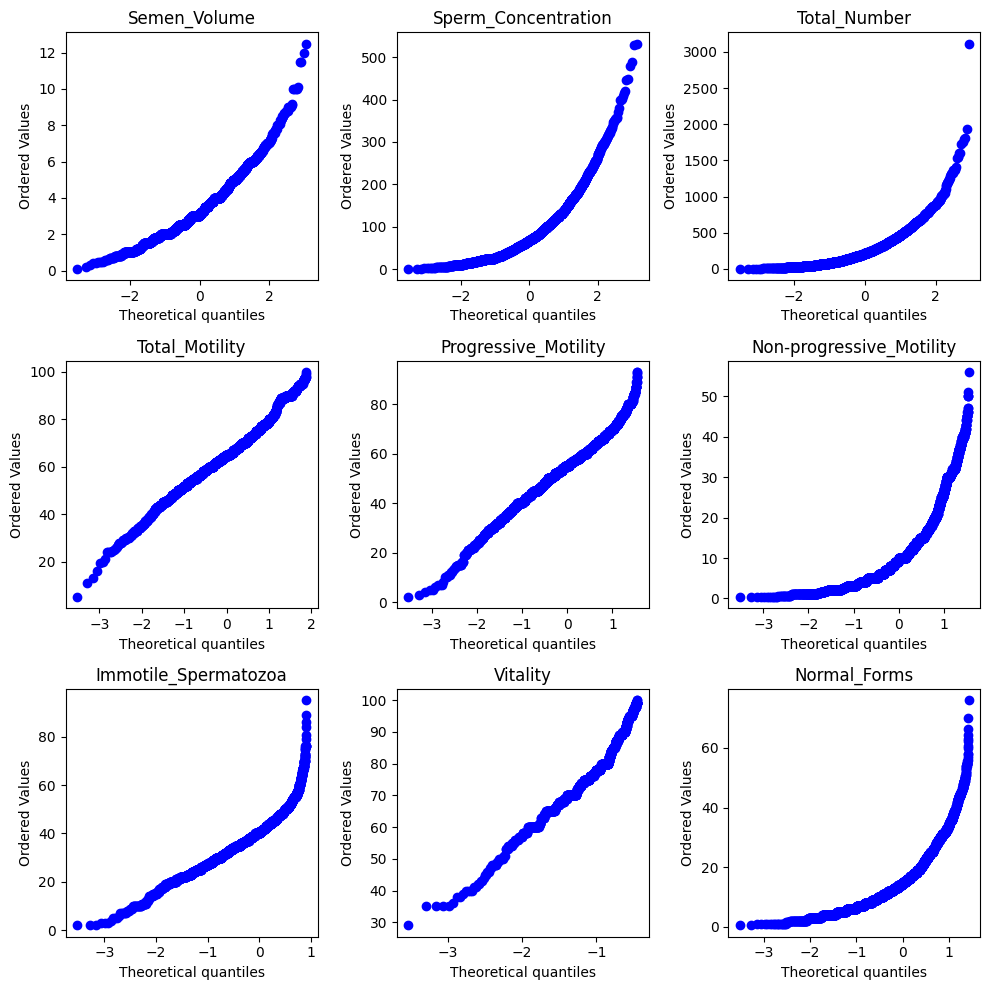

In [21]:
import scipy.stats as stats

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(10,10))
axs = axs.flatten() #hago que el array sea plano para poder llamar cada posicion en un bucle.

for i, column in enumerate(num_df_sperm):
    ax = axs[i]
    stats.probplot(num_df_sperm[column], dist="norm", plot=ax, fit=True, rvalue=True)
    ax.set_title(column)
    plt.tight_layout()
    
plt.show()

Observando estos graficos podemos deducir que las variables Total_Motility, Progressive_Motility y Vitality presentan una distribucion normal y por lo tanto reemplazaremos los NaN con la media. Para el resto, utilizaremos la mediana.

In [22]:
media_columns = ['Total_Motility', 'Progressive_Motility', 'Vitality']  
mediana_columns = ['Semen_Volume', 'Sperm_Concentration', 'Total_Number', 'Non-progressive_Motility', 'Immotile_Spermatozoa', 'Normal_Forms']

for column in media_columns:
    df_sperm[column] = df_sperm[column].fillna(df_sperm[column].mean())

for column in mediana_columns:
    df_sperm[column] = df_sperm[column].fillna(df_sperm[column].median())

# Verificar el resultado
df_sperm

,Publisher,Semen_Volume,Sperm_Concentration,Total_Number,Total_Motility,Progressive_Motility,Non-progressive_Motility,Immotile_Spermatozoa,Vitality,Normal_Forms
0,Aboutorabi,3.2,27.0,86.4,35.0,20.0,15.0,65.0,77.512015,13.5
1,Aboutorabi,0.8,136.0,108.8,47.0,35.0,12.0,53.0,77.512015,13.5
2,Aboutorabi,2.0,71.0,142.0,49.0,42.0,7.0,51.0,77.512015,13.5
3,Aboutorabi,1.0,35.0,35.0,50.0,28.0,22.0,50.0,77.512015,13.5
4,Aboutorabi,2.0,46.0,92.0,51.0,28.0,33.0,49.0,77.512015,13.5
...,...,...,...,...,...,...,...,...,...,...
3579,Tang,2.0,115.0,230.0,79.0,77.0,2.0,37.0,82.000000,25.0
3581,Tang,4.0,22.0,88.0,35.0,32.0,3.0,37.0,38.000000,23.0
3586,Tang,2.0,109.0,218.0,64.0,44.0,20.0,36.0,77.512015,11.0
3587,Tang,6.2,96.0,595.2,39.0,29.0,10.0,61.0,77.512015,7.0


In [23]:
#chequeo que no haya NaN
df_sperm.isnull().sum()

Publisher                   0
Semen_Volume                0
Sperm_Concentration         0
Total_Number                0
Total_Motility              0
Progressive_Motility        0
Non-progressive_Motility    0
Immotile_Spermatozoa        0
Vitality                    0
Normal_Forms                0
dtype: int64

#### Analisis de Vairables

El objetivo final de esta Seccion 1 es realizar un analisis complejo que relacione todas las variables, por ejemplo a traves de un algoritmo de clustering, para determinar cual es el patron que define a la fertilidad masaculina. Pero previo a la utilizacion de estadistica mas compleja, analizo el dataset que resulto del preprocesamiento.

In [24]:
df_sperm.shape

(3312, 10)

Observamos nuevamente la distribucion de cada variable:

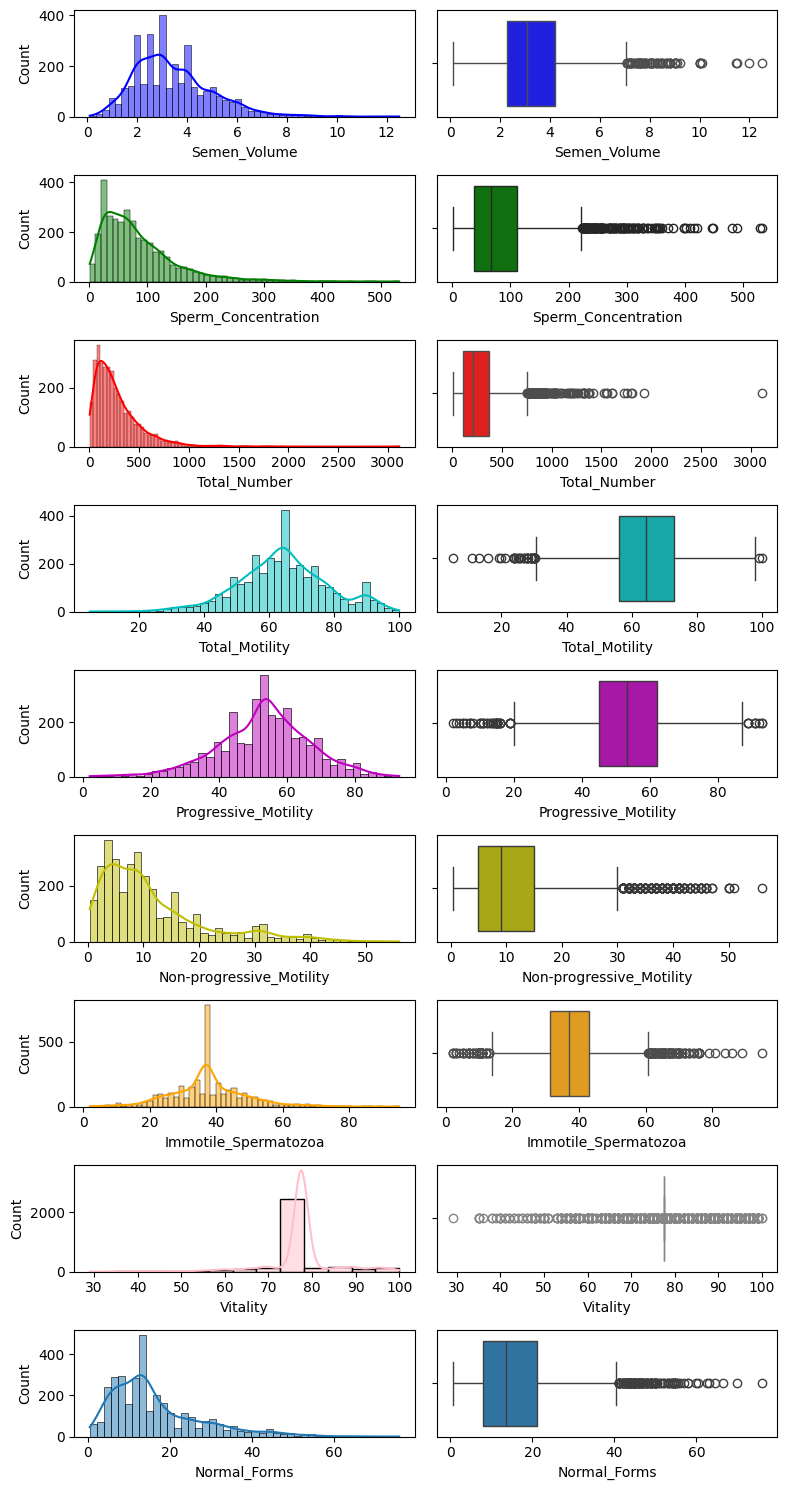

In [25]:
# Creo una figura con 9 filas y 2 columnas de subplots
fig, axs = plt.subplots(nrows=9, ncols=2, figsize=(8, 15))


# Grafico en cada subplot

sns.histplot(data=df_sperm, x='Semen_Volume', ax=axs[0, 0], color='b', kde=True)
sns.boxplot(data=df_sperm, x='Semen_Volume', ax=axs[0, 1], color='b')
sns.histplot(data=df_sperm, x='Sperm_Concentration', ax=axs[1, 0], color='g', kde=True)
sns.boxplot(data=df_sperm, x='Sperm_Concentration', ax=axs[1, 1], color='g')
sns.histplot(data=df_sperm, x='Total_Number', ax=axs[2, 0], color='r', kde=True)
sns.boxplot(data=df_sperm, x='Total_Number', ax=axs[2, 1], color='r')
sns.histplot(data=df_sperm, x='Total_Motility', ax=axs[3, 0], color='c', kde=True)
sns.boxplot(data=df_sperm, x='Total_Motility', ax=axs[3, 1], color='c')
sns.histplot(data=df_sperm, x='Progressive_Motility', ax=axs[4, 0], color='m', kde=True)
sns.boxplot(data=df_sperm, x='Progressive_Motility', ax=axs[4, 1], color='m')
sns.histplot(data=df_sperm, x='Non-progressive_Motility', ax=axs[5, 0], color='y', kde=True)
sns.boxplot(data=df_sperm, x='Non-progressive_Motility', ax=axs[5, 1], color='y')
sns.histplot(data=df_sperm, x='Immotile_Spermatozoa', ax=axs[6, 0], color='orange', kde=True)
sns.boxplot(data=df_sperm, x='Immotile_Spermatozoa', ax=axs[6, 1], color='orange')
sns.histplot(data=df_sperm, x='Vitality', ax=axs[7, 0], color='pink', kde=True)
sns.boxplot(data=df_sperm, x='Vitality', ax=axs[7, 1], color='pink')
sns.histplot(data=df_sperm, x='Normal_Forms', ax=axs[8, 0], kde=True)
sns.boxplot(data=df_sperm, x='Normal_Forms', ax=axs[8, 1])


plt.tight_layout()
plt.show()

In [26]:
df_sperm.describe()

,Semen_Volume,Sperm_Concentration,Total_Number,Total_Motility,Progressive_Motility,Non-progressive_Motility,Immotile_Spermatozoa,Vitality,Normal_Forms
count,3312.000000,3312.000000,3312.000000,3312.000000,3312.000000,3312.000000,3312.000000,3312.000000,3312.000000
mean,3.436141,83.717859,274.033268,64.410651,53.340932,11.306367,37.602654,77.512015,16.362319
std,1.555208,65.217339,235.063336,13.652923,13.356460,9.461657,11.105978,7.600814,11.049601
min,0.100000,0.900000,2.520000,5.000000,2.000000,0.333333,2.000000,29.000000,0.500000
25%,2.300000,37.000000,111.724875,56.000000,45.000000,5.000000,31.190662,77.512015,8.000000
50%,3.100000,67.000000,212.500000,64.410651,53.340932,9.000000,37.000000,77.512015,13.500000
75%,4.200000,111.000000,369.000000,73.000000,62.000000,15.000000,43.056452,77.512015,21.000000
max,12.500000,532.000000,3115.200000,100.000000,93.000000,56.000000,95.000000,100.000000,76.000000


Como se puede observar, existe una gran variabilidad en todos los parametros medidos. Esta es una caracteristica comun en la biologia que se dedica al estudio de la fisiologia humana. 

Me interesa estudiar, por ejemplo, si existe una relacion entre la motilidad progresiva de los espermatozoides, relevante en la capacidad de fertilizacion, y la morfologia. Para esto realizo un scatter plot:

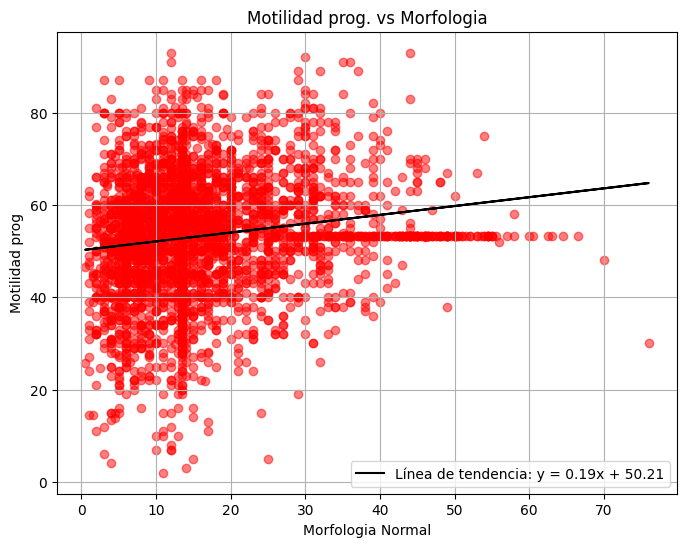

In [27]:
plt.figure(figsize=(8,6)) 
plt.scatter(df_sperm['Normal_Forms'], df_sperm['Progressive_Motility'], color='red', alpha=0.5) 
plt.xlabel('Morfologia Normal')
plt.ylabel('Motilidad prog')
plt.title('Motilidad prog. vs Morfologia')
plt.grid(True)

slope, intercept = np.polyfit(df_sperm['Normal_Forms'], df_sperm['Progressive_Motility'], 1)
y_tendencia = slope * df_sperm['Normal_Forms'] + intercept

plt.plot(df_sperm['Normal_Forms'], y_tendencia, color='black', label=f'Línea de tendencia: y = {slope:.2f}x + {intercept:.2f}')

plt.legend()
plt.show()

Si bien hay mucha dispersion en los datos, es esperable que exista una relacion lineal positiva entre estos dos parametros.

Otro par de variables que me interesa relacionar es la concentracion de celulas y y la motilidad progresiva:

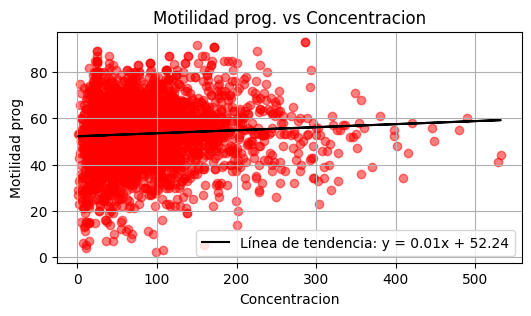

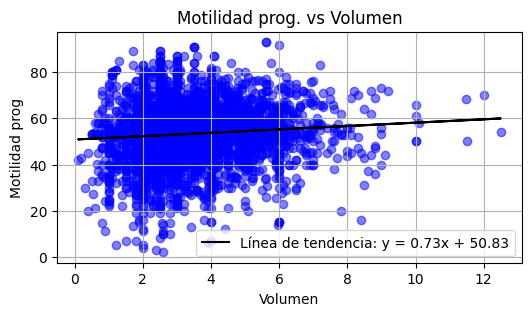

In [28]:
plt.figure(figsize=(6,3)) 
plt.scatter(df_sperm['Sperm_Concentration'], df_sperm['Progressive_Motility'], color='red', alpha=0.5) 
plt.xlabel('Concentracion')
plt.ylabel('Motilidad prog')
plt.title('Motilidad prog. vs Concentracion')
plt.grid(True)

slope, intercept = np.polyfit(df_sperm['Sperm_Concentration'], df_sperm['Progressive_Motility'], 1)
y_tendencia = slope * df_sperm['Sperm_Concentration'] + intercept

plt.plot(df_sperm['Sperm_Concentration'], y_tendencia, color='black', label=f'Línea de tendencia: y = {slope:.2f}x + {intercept:.2f}')

plt.legend()
plt.show()


plt.figure(figsize=(6,3)) 
plt.scatter(df_sperm['Semen_Volume'], df_sperm['Progressive_Motility'], color='blue', alpha=0.5) 
plt.xlabel('Volumen')
plt.ylabel('Motilidad prog')
plt.title('Motilidad prog. vs Volumen')
plt.grid(True)

slope, intercept = np.polyfit(df_sperm['Semen_Volume'], df_sperm['Progressive_Motility'], 1)
y_tendencia = slope * df_sperm['Semen_Volume'] + intercept

plt.plot(df_sperm['Semen_Volume'], y_tendencia, color='black', label=f'Línea de tendencia: y = {slope:.2f}x + {intercept:.2f}')


plt.legend()
plt.show()

A simple vista, con el dato de la pendiente de la linea de tendencia, podemos sugerir que el volumen de muestra puede ser un factor relevante en la motilidad progresiva de los espermatozoides.

Ahora analizare todos los pares posibles:

<Figure size 1500x600 with 0 Axes>

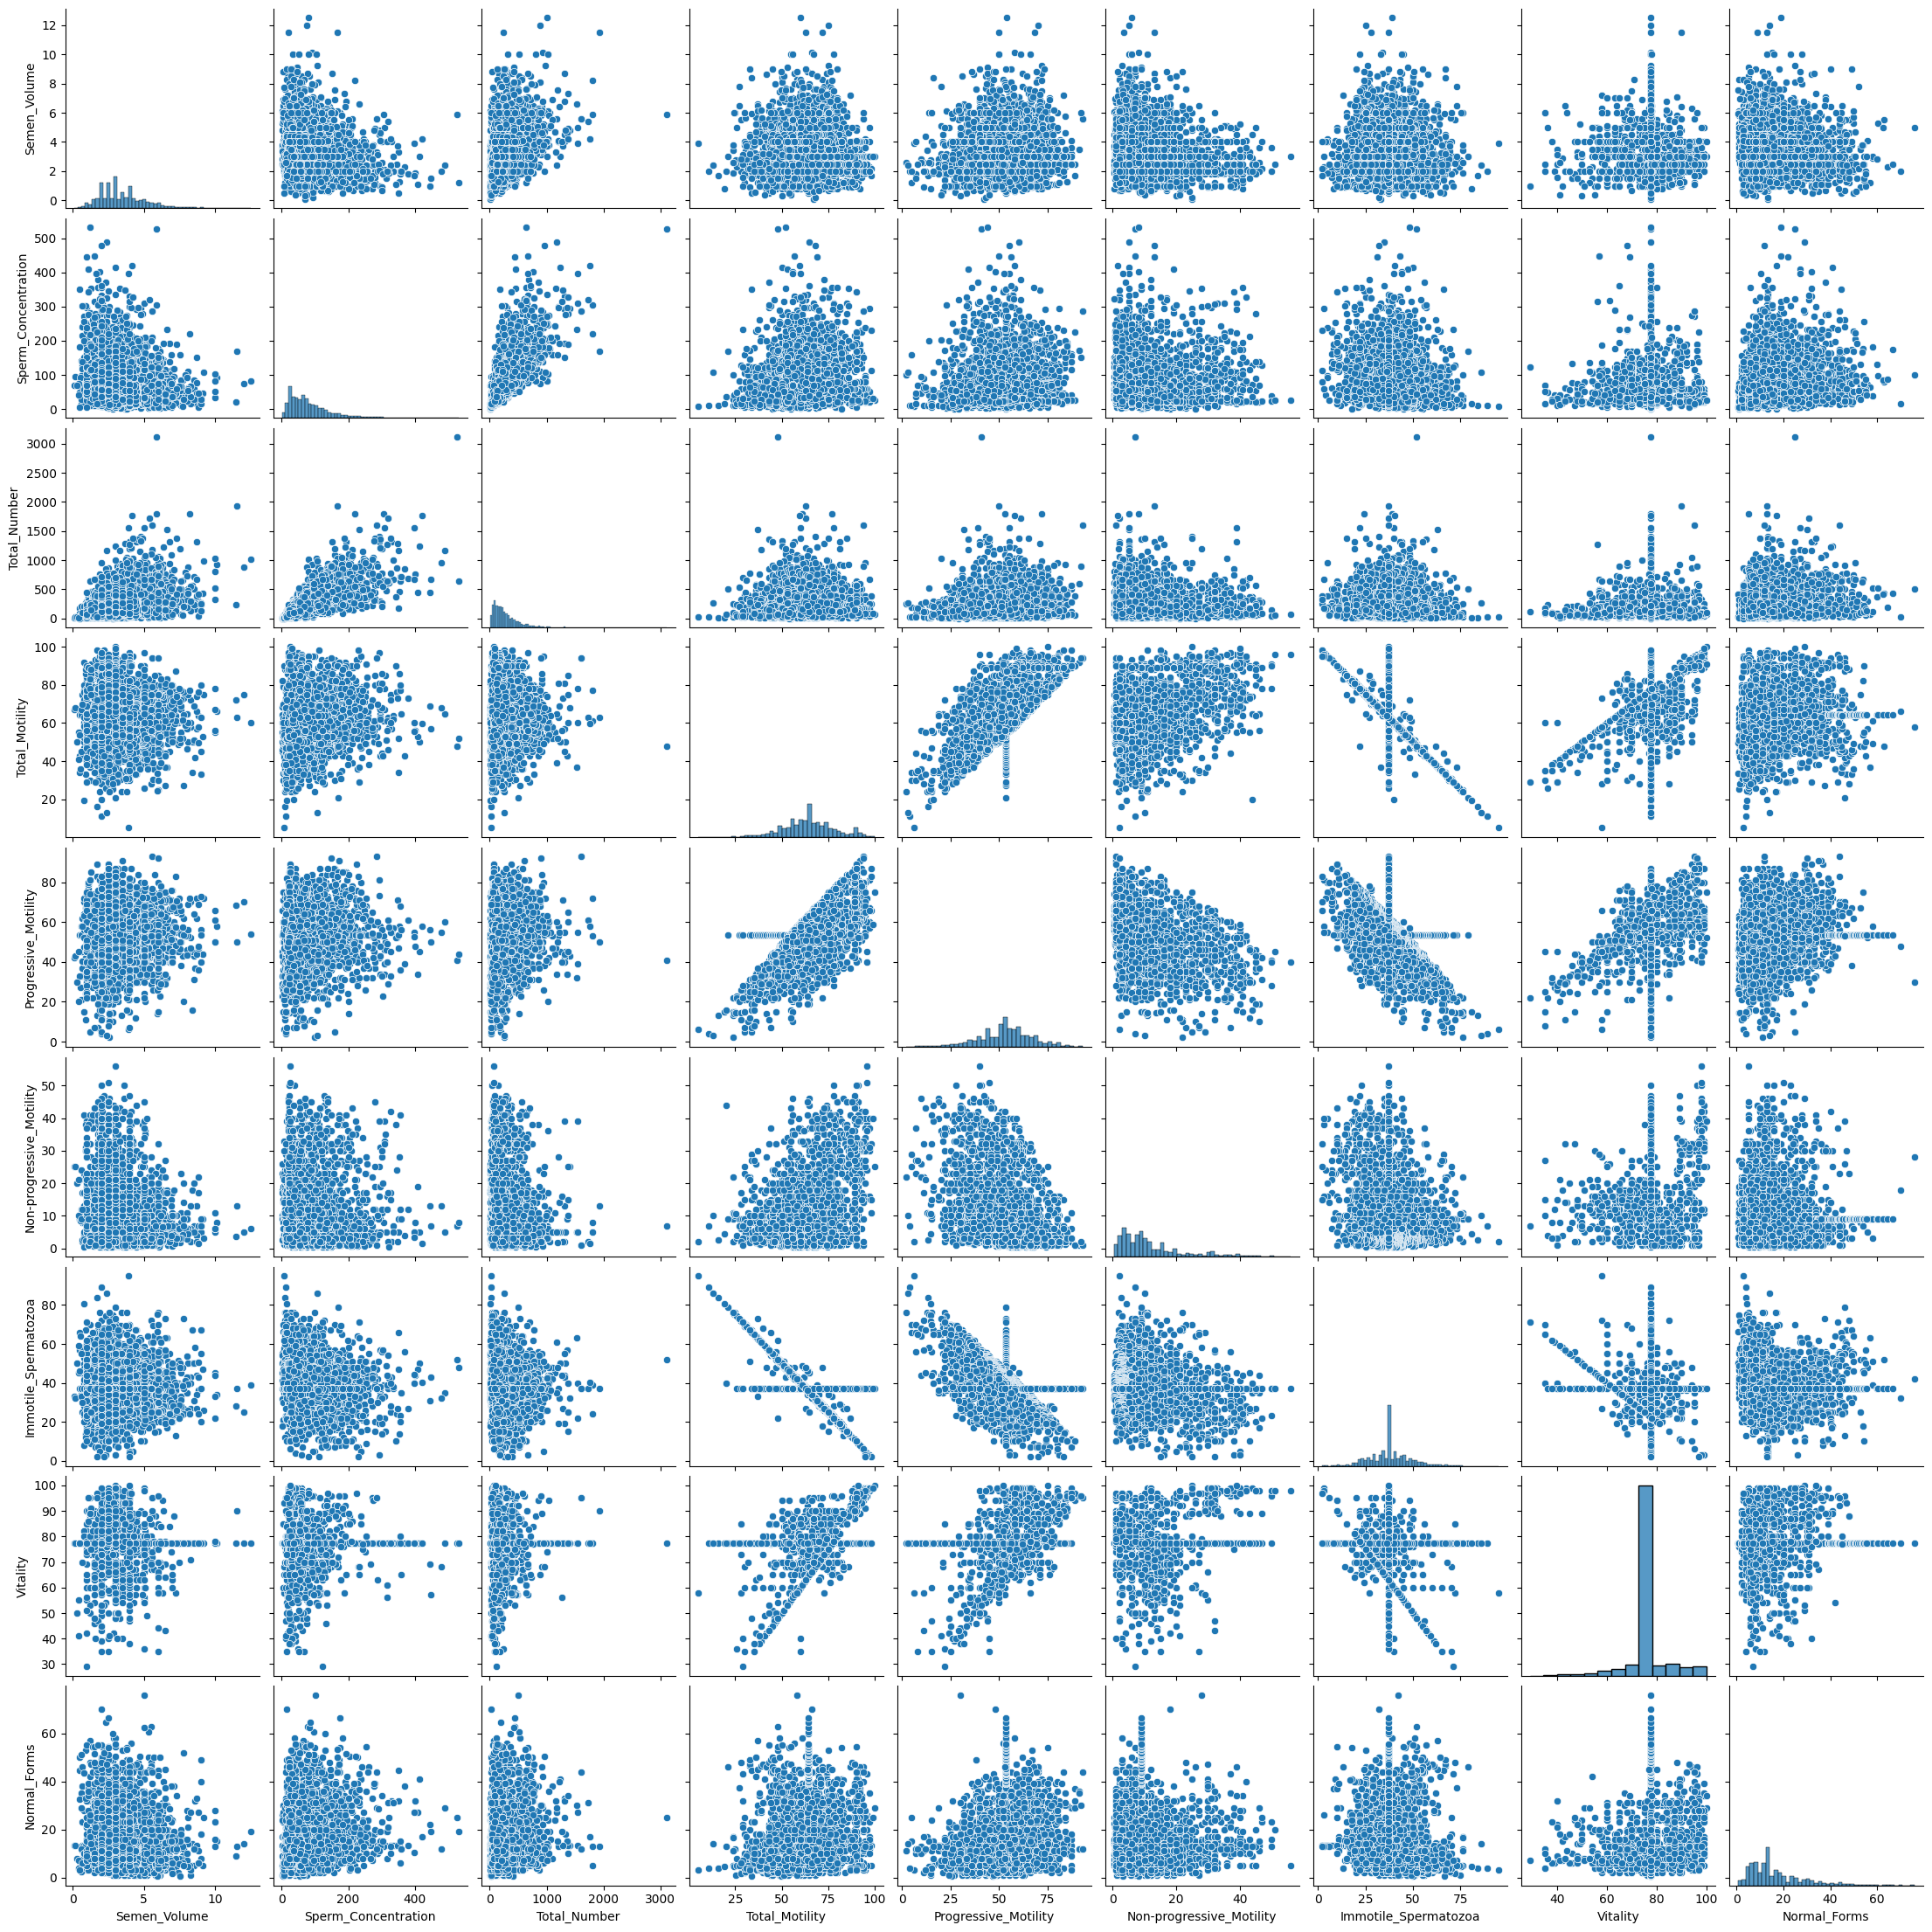

In [29]:
plt.figure(figsize=(15,6))
sns.pairplot(df_sperm)
plt.show()

In [32]:
#excluyo de mi dataset la columna 'Publisher' (no numerica)
num_df_sperm = df_sperm.drop('Publisher', axis=1)

# Correlacion
corrmat = num_df_sperm.corr()
corrmat

,Semen_Volume,Sperm_Concentration,Total_Number,Total_Motility,Progressive_Motility,Non-progressive_Motility,Immotile_Spermatozoa,Vitality,Normal_Forms
Semen_Volume,1.000000,-0.135292,0.394240,-0.050121,0.085067,-0.188980,-0.000570,-0.016454,-0.025664
Sperm_Concentration,-0.135292,1.000000,0.760692,0.037916,0.064251,-0.017141,-0.109026,-0.015162,0.169789
Total_Number,0.394240,0.760692,1.000000,0.003121,0.105499,-0.131138,-0.073385,-0.003417,0.149669
Total_Motility,-0.050121,0.037916,0.003121,1.000000,0.723309,0.331950,-0.816659,0.465613,0.052637
Progressive_Motility,0.085067,0.064251,0.105499,0.723309,1.000000,-0.368364,-0.622461,0.371315,0.158484
Non-progressive_Motility,-0.188980,-0.017141,-0.131138,0.331950,-0.368364,1.000000,-0.205130,0.148310,-0.079250
Immotile_Spermatozoa,-0.000570,-0.109026,-0.073385,-0.816659,-0.622461,-0.205130,1.000000,-0.120471,-0.028398
Vitality,-0.016454,-0.015162,-0.003417,0.465613,0.371315,0.148310,-0.120471,1.000000,0.104031
Normal_Forms,-0.025664,0.169789,0.149669,0.052637,0.158484,-0.079250,-0.028398,0.104031,1.000000


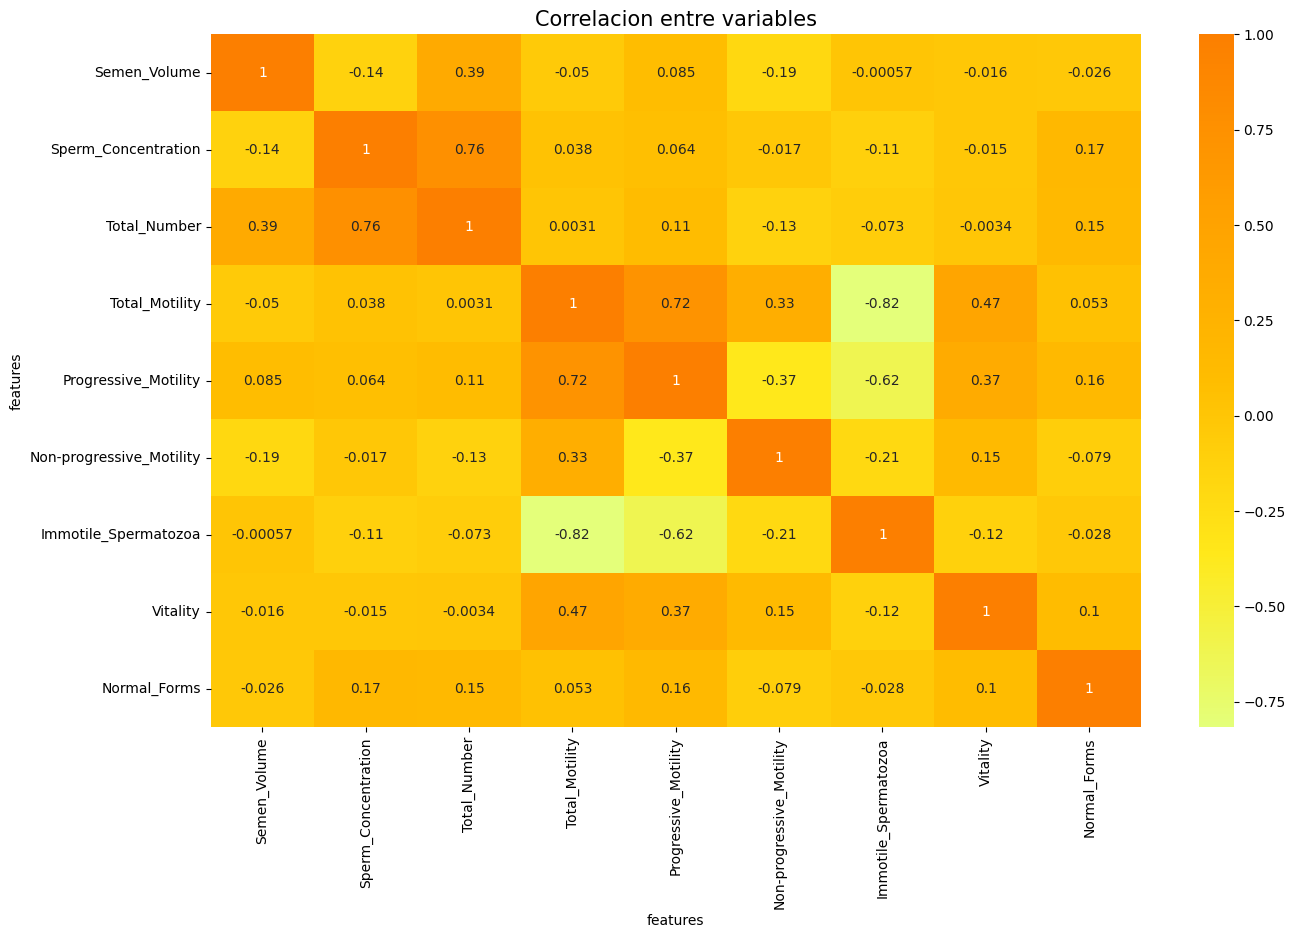

In [34]:
#Heatmap

fig, ax = plt.subplots(1, 1, figsize=(15, 9))
sns.heatmap(num_df_sperm.corr(), annot=True,cmap='Wistia')
ax.set(xlabel='features')
ax.set(ylabel='features')

plt.title('Correlacion entre variables', fontsize = 15, c='black')
plt.show()